In [68]:
# Import the packages needed for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load the data and see an overview of the columns and rows. 


df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The data set is from mall customers and data was gathered through membership cards. Spending Score is assigned to the customer based on the defined parameters like customer behavior and spending nature/ spending data.

Spending Score (1-100) is a score assigned by the mall based on customer behavior and spending nature

In [39]:
# Check how many columns and rows are in the data

df.shape

(200, 5)

Next, use the describe() function on the data to see the descriptive statistics for each variable. It’s important to really take the time here and understand what these numbers are saying. 

In [40]:
# Use summary statistics to describe the data

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


For example, you would know there’s a problem if the Spending Score (1–100) column, which is clearly a range of values between 1 and 100, had a negative min or a max that went beyond 100.

From calling describe, you can see that there are no values to clean. Age looks pretty normally distributed, annual income doesn’t have outliers that are too excessive. Spending score is in fact between 1 and 100. Everything looks good.

In [41]:
# To check data types which includes integers and object
# Int64 in Python which stands for 64 bit integer. The 64 refers to the memory allocated to store data in each cell 
# which effectively relates to how many digits it can store in each “cell”. 
# In short, a number which is not a fraction; a whole number.

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [42]:
# To check if there are null values (A null value in a relational database is used when the value 
# in a column is unknown or missing. A null is neither an empty string )

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [43]:
# Since customer ID is not important component of the analysis. It will be dropped or removed

df.drop(["CustomerID"],axis=1, inplace=True)

In [44]:
# Check the columns if customer ID is removed

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Text(0.5, 1.0, 'Correlation Factors Heat Map')

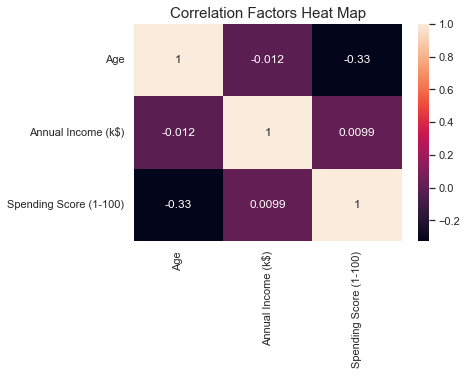

In [45]:
# Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend 
# between the two variables. The close to 1 the correlation is the more positively correlated they are;
# that is as one increases so does the other and the closer to 1 the stronger this relationship is.

sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')

The only variables that are even remotely connected are spending score and age, as shown in the graph above. It's a negative correlation, thus the older a consumer is, the lower their spending score. However, because the correlation is only 0.33, it isn't very strong. It's still a little bit informative.

C:\Users\Ricardo S. Biason\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ricardo S. Biason\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ricardo S. Biason\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version

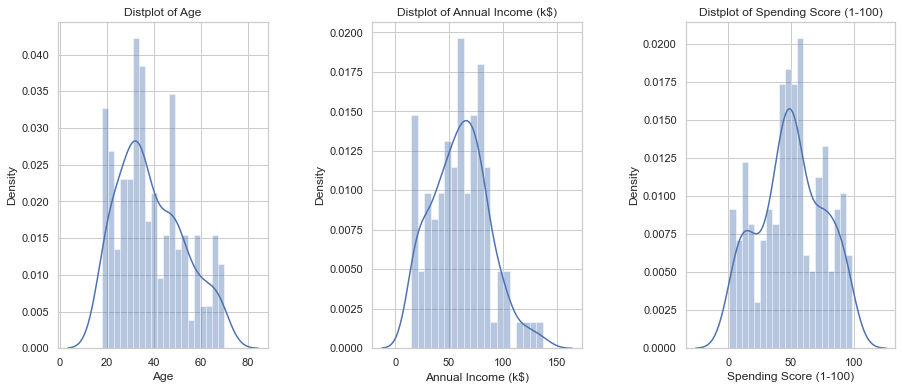

In [46]:
# Plot the Age, Annual Income and Spending score in a distribution plot to see the density of each.

plt.figure(1, figsize=(15,6))
n=0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}' .format(x))
plt.show()

Age Distribution has higher density around 30-35 years old. 
Annual Income Distribution has higher density around 55,000. 
Spending Score Distribution has higher density around 50.

We can dempgraphically segment age from 30-35 years old. Target annual income earners that earns = > 55,000. Offer products/service that has spending score = to 50.

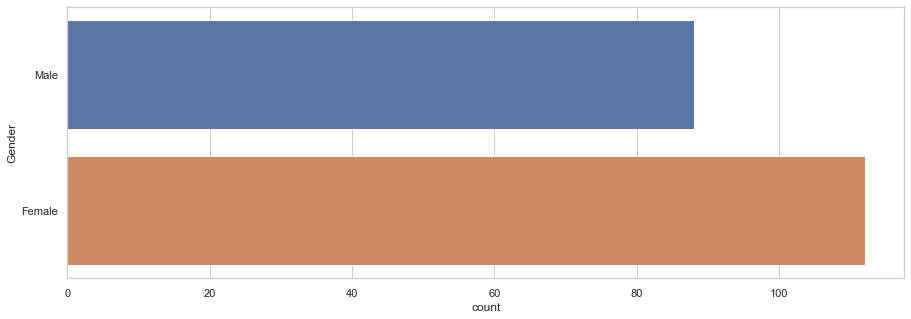

In [47]:
# Plot the number of males and females using a horizontal bar plot

plt.figure(figsize=(15,5))
sns.countplot(y='Gender' ,data=df)
plt.show()

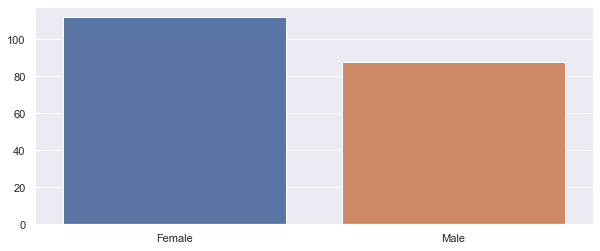

In [48]:
# Or Use a vertical bar plot the number of males and females

genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Approximately we have 110 Females and 90 males

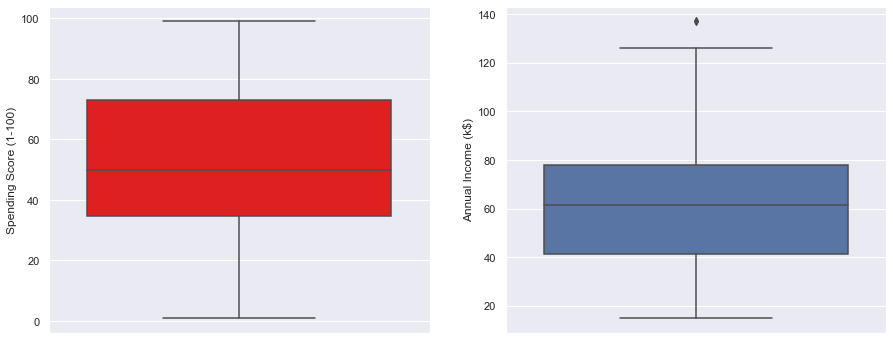

In [49]:
# Create a box plot of spending score and annual income to better visualize the distribution range. 
# The range of spending score is clearly more than the annual income range.

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

Create a box plot of spending score and annual income to better visualize the distribution range. The range of spending score is clearly more than the annual income range. These clearly says that people are spending more than they are earning.

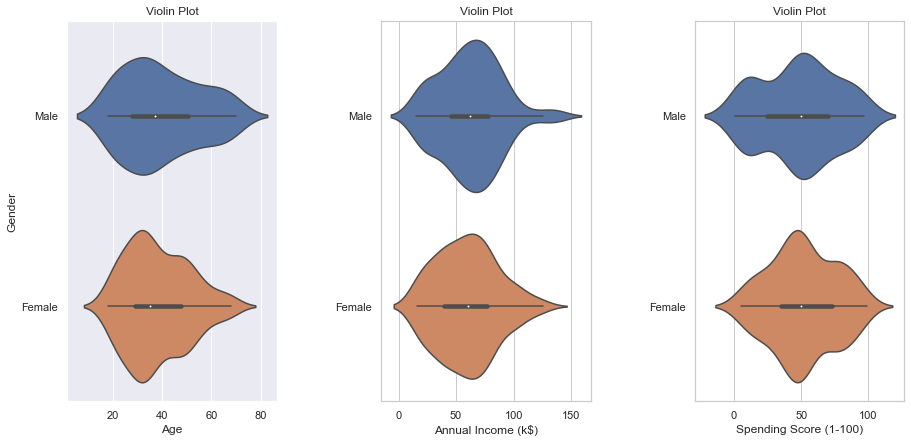

In [50]:
# Differentiate males and females Age, Annual income and spending score using violin plot
# A Bivariate Analysis between the Gender and the Annual Income, 
# to better visualize the Income of the different Genders.
# There are more number of males who get paid more than females. 
# But, The number of males and females are equal in number when it comes to low annual income.

plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df )
    plt.ylabel('Gender' if n == 1 else ' ')
    plt.title('Violin Plot')
plt.show()

Demographically, there is a higher density of females around 30-35 years old. Males and females earn the same since both have higher density at 60k but there are more males that earn 60k than females. Females spend more than males. 

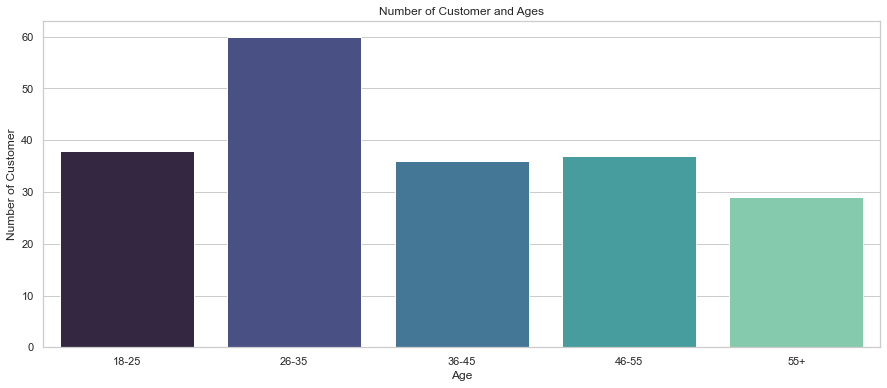

In [51]:
# Segment the number of customers based on age

age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

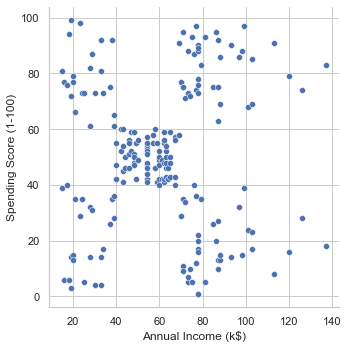

In [52]:
# We will use a scatter plot to understand the relationship between Annual Income and Spending Score

sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

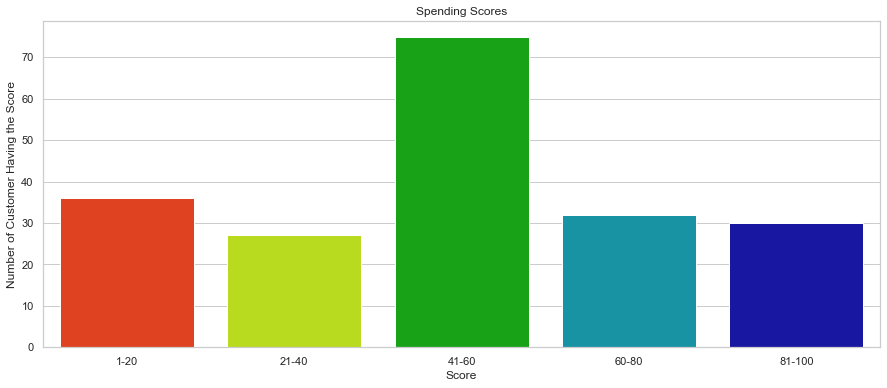

In [53]:
# Divide Spending Score into different categories (Palette "rocket")

ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "60-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

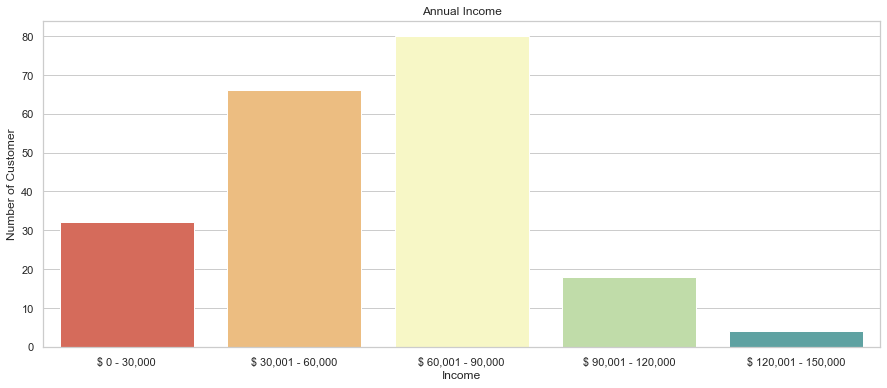

In [54]:
# Divide Annual Income into different categories

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values) ]
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


In [55]:
from sklearn.cluster import KMeans

Plot the Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

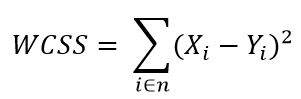

Where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

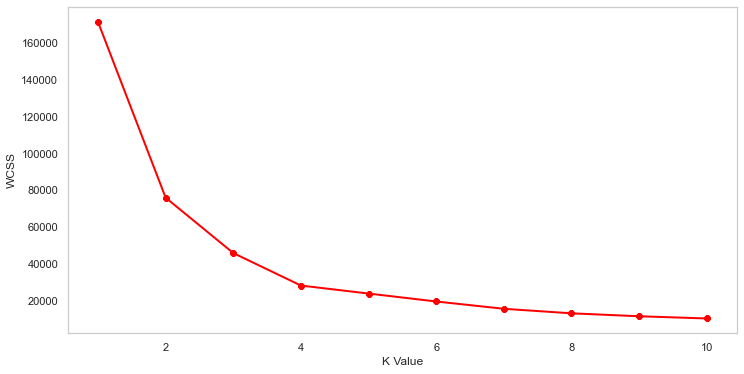

In [56]:
# To understand the optimum number of clusters by using the WCSS = within clusters sum of squares
# The optimal K value is found to be 4 using the elbow method.
# Minimize the distance between points in a cluster and simultaneously maximize the distance between clusters
# The term k in K-Means refers to the number of clusters. Therefore, we have to find the best value of k that we will use for modeling. We can use the Elbow Plot method. 
# The value of k taken is the value of k which is in the angular position of the arm.

X1=df.loc[:, ["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [57]:
# There is a bend at 4 which is the optimum clusters

kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)


[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [58]:
# The data is divided into 4 clusters which is 0, 1, 2, 3. Let us check the centroids x and y coordinates.

print(kmeans.cluster_centers_)


[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


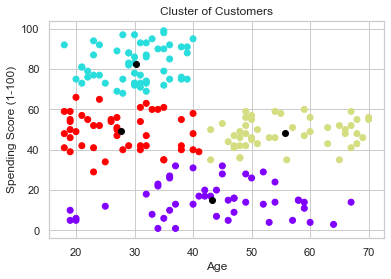

In [59]:
# To visualize the centroids in a graph and see the 4 clusters

plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

## Segmentation based on 4 clusters

_Spending score and age_

- Segment 1 = Spending score 65-99, age 20-24
- Segment 2 = Spending score 40-60, age 18-35
- Segment 3 = Spending score 40-60, age 35-70
- Segment 4 = Spending score 1-35, age 20-60

There is higher spending score from 65 to 99 whos age are from 20 to 40 years old

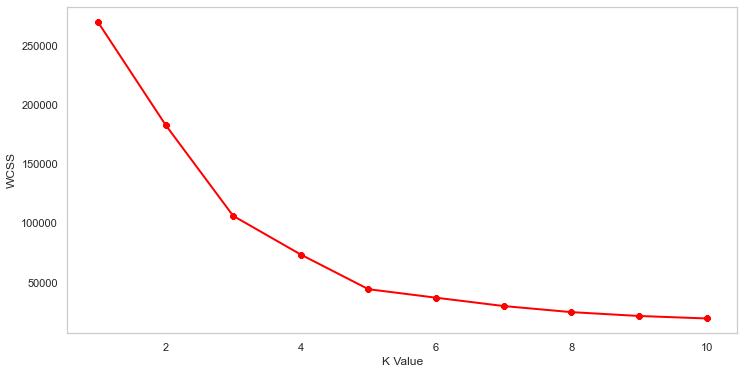

In [60]:
# To cluster Annual Income and Spending Score. To see the optimum number of clusters

X2=df.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [61]:
# There is a bend at 5 which is the optimum clusters

kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 2 1 4 1 4 1 4 1 4 1 2 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [62]:
# The data is divided into 5 clusters which is 0, 1, 2, 3 and 4. Let us check the centroids x and y coordinates.

print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


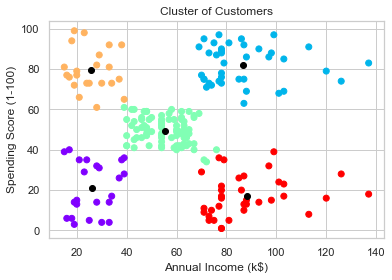

In [63]:
# To visualize the centroids in a graph and see the 5 clusters

plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

## Segmentation based on 5 clusters

_Spending score and Annual income_

- Segment 1 = Spending score 60-99, annual income 18k-40k
- Segment 2 = Spending score 62-99, annual income 65k-140k
- Segment 3 = Spending score 40-60, annual income 40k-65k
- Segment 4 = Spending score 1-40, annual income 18k-40k
- Segment 5 = Spending score 1-40, annual income 65k to 140k

There is high-density for Spending score from 60 to 100 for income earners from 20-40k.

There is high-density for spending score from 40 to 60 for income earners from 40k-60k.

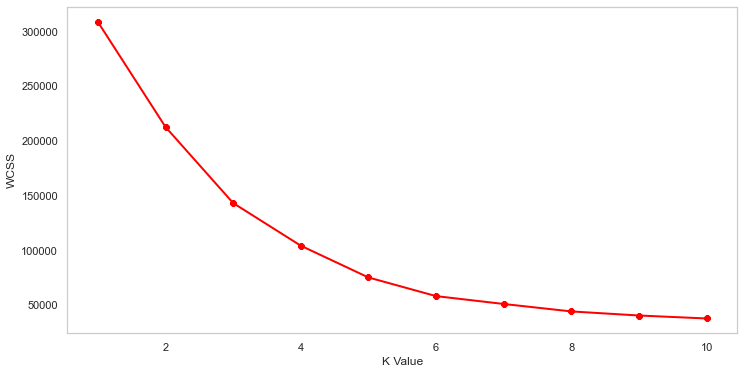

In [64]:
# To visualize 3 variables

X3=df.iloc[:,1:]

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [65]:
# There is a bend at 5 which is the optimum clusters

kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [66]:
# View centriods of 5 clusters. Included Age, Annual Income and Spending Score)
print(kmeans.cluster_centers_)

[[40.66666667 87.75       17.58333333]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [25.52173913 26.30434783 78.56521739]]


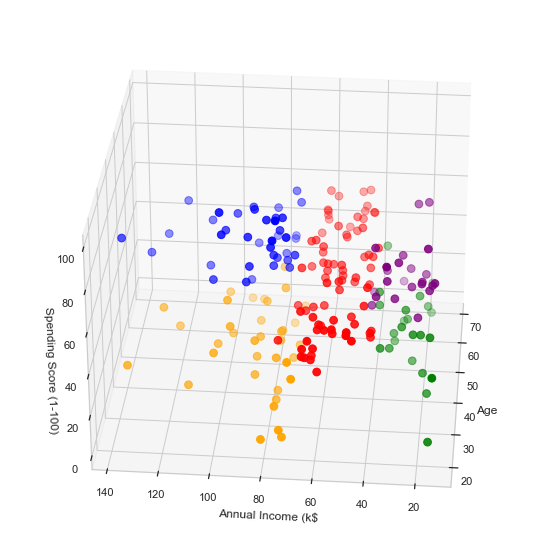

In [67]:
# Since we used three variables we will use a 3D graph

clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)        
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)         
ax.view_init(30, 185)   
           
plt.xlabel("Age")
plt.ylabel("Annual Income (k$")
ax.set_zlabel("Spending Score (1-100)")
           
plt.show()

Therefore, we can demographically segment ages from 30-35 years old. Target annual income earners that earns greater than 55,000. Offer products/service that has spending score of more than 50 to females since females have the highest spending score compared to males. Males and females earn the same since both have higher density at 55k but there are more males that earn 60k than females. However, females spend more than males. 

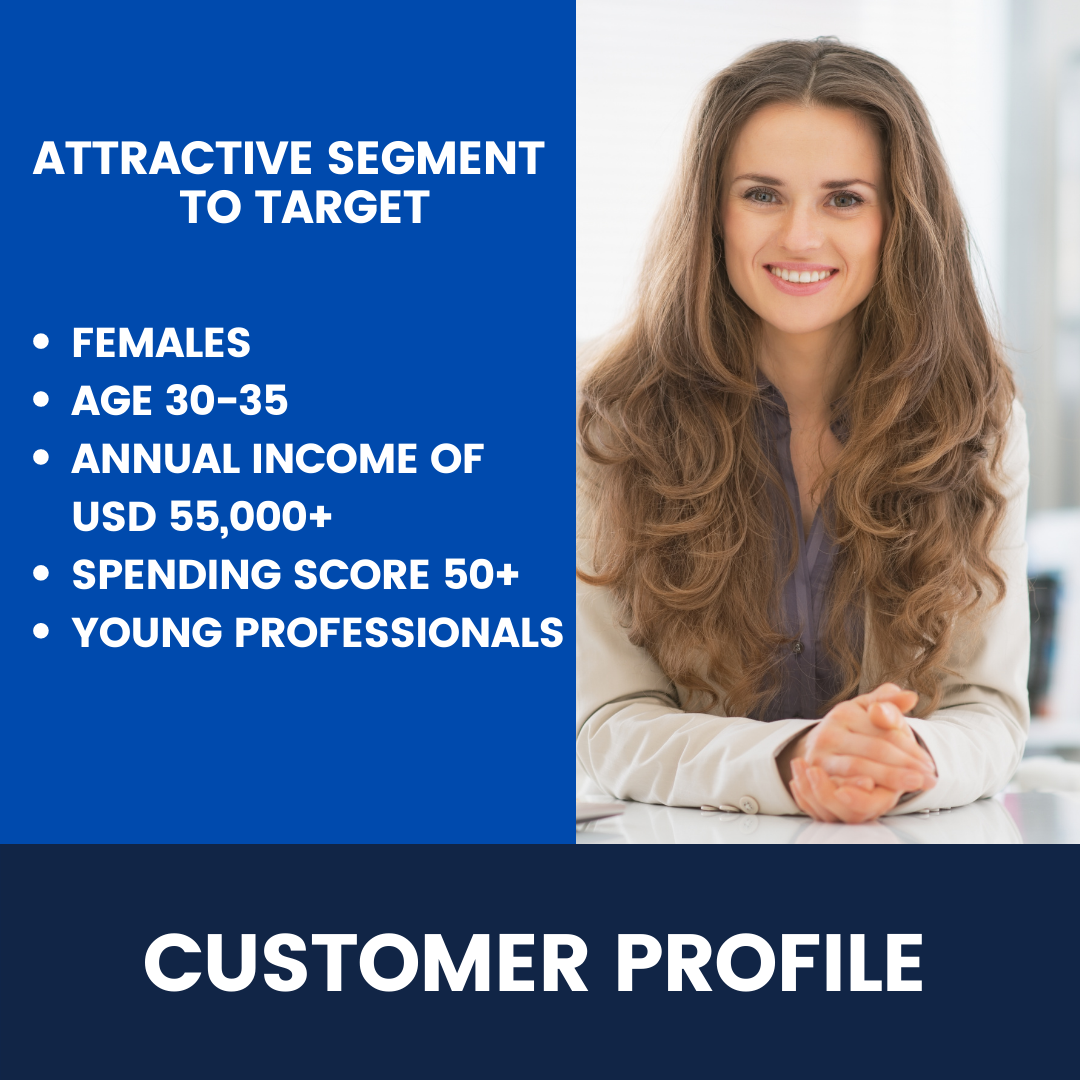